# 决策树二分类

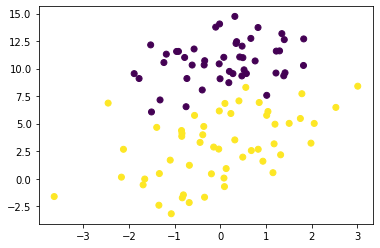

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import tree

#载入数据
data = np.genfromtxt('LR-testSet.csv',delimiter=',')
x_data = data[:,:-1]
y_data = data[:,-1]

plt.scatter(x_data[:,0],x_data[:,-1],c=y_data)
plt.show()



In [21]:
#创建CART决策树模型
model = tree.DecisionTreeClassifier()
model.fit(x_data,y_data)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

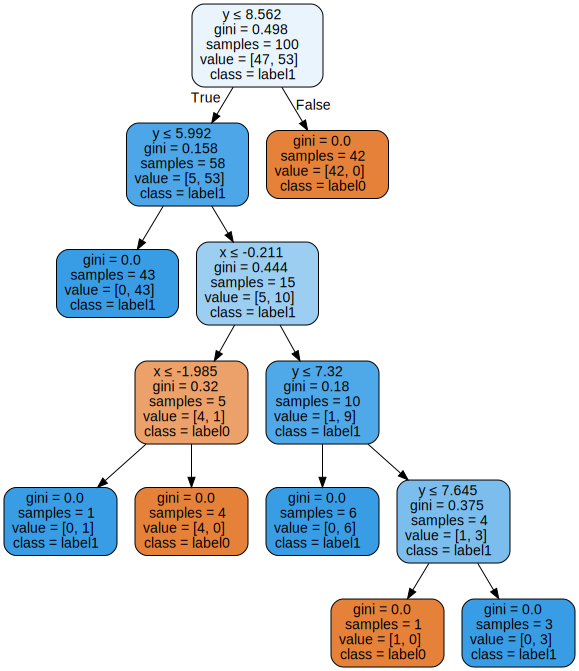

In [22]:
# 导出决策树
import graphviz

dot_data = tree.export_graphviz(model,
                                out_file=None,
                                #特征的名字，要设置
                                feature_names = ['x','y'],
                                class_names=['label0','label1'],
                                filled=True,
                                rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph.render('my_cart')
graph


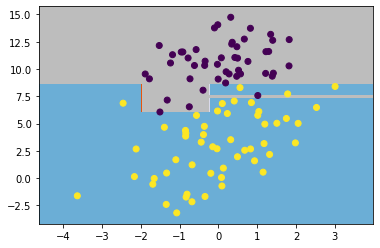

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47
         1.0       1.00      1.00      1.00        53

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [23]:
#获取数据值所在范围
x_min,x_max = x_data[:,0].min() - 1,x_data[:,0].max() + 1
y_min,y_max = x_data[:,1].min() - 1,x_data[:,1].max() + 1

#生成网格矩阵
xx,yy = np.meshgrid(
                    np.arange(x_min,x_max,0.02),
                    np.arange(y_min,y_max,0.02)
                    )

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
#扁平化，得到一个一个的点
#ravel和flatten类似，多维数据转一维，flatten不会改变原始数据，而ravel会
z = z.reshape(xx.shape)

#等高线图,只有两个高度，0和1
cs = plt.contourf(xx,yy,z,cmap=plt.cm.cmapname)

#样本散点图
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

predictions = model.predict(x_data)
#查看分类的结果和正确率。
print(classification_report(predictions,y_data))

#  决策树非线性二分类

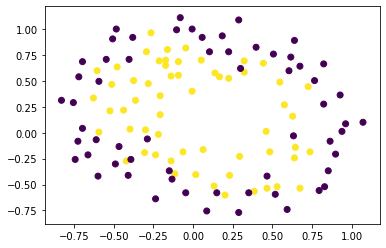

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz

#载入数据
data = np.genfromtxt('LR-testSet2.txt',delimiter=',')
x_data = data[:,:-1]
y_data = data[:,-1]

plt.scatter(x_data[:,0],x_data[:,-1],c=y_data)
plt.show()



In [3]:
#分割数据     训练集：测试集=3:1
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,train_size=0.75,test_size=0.25)


#创建决策树模型
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

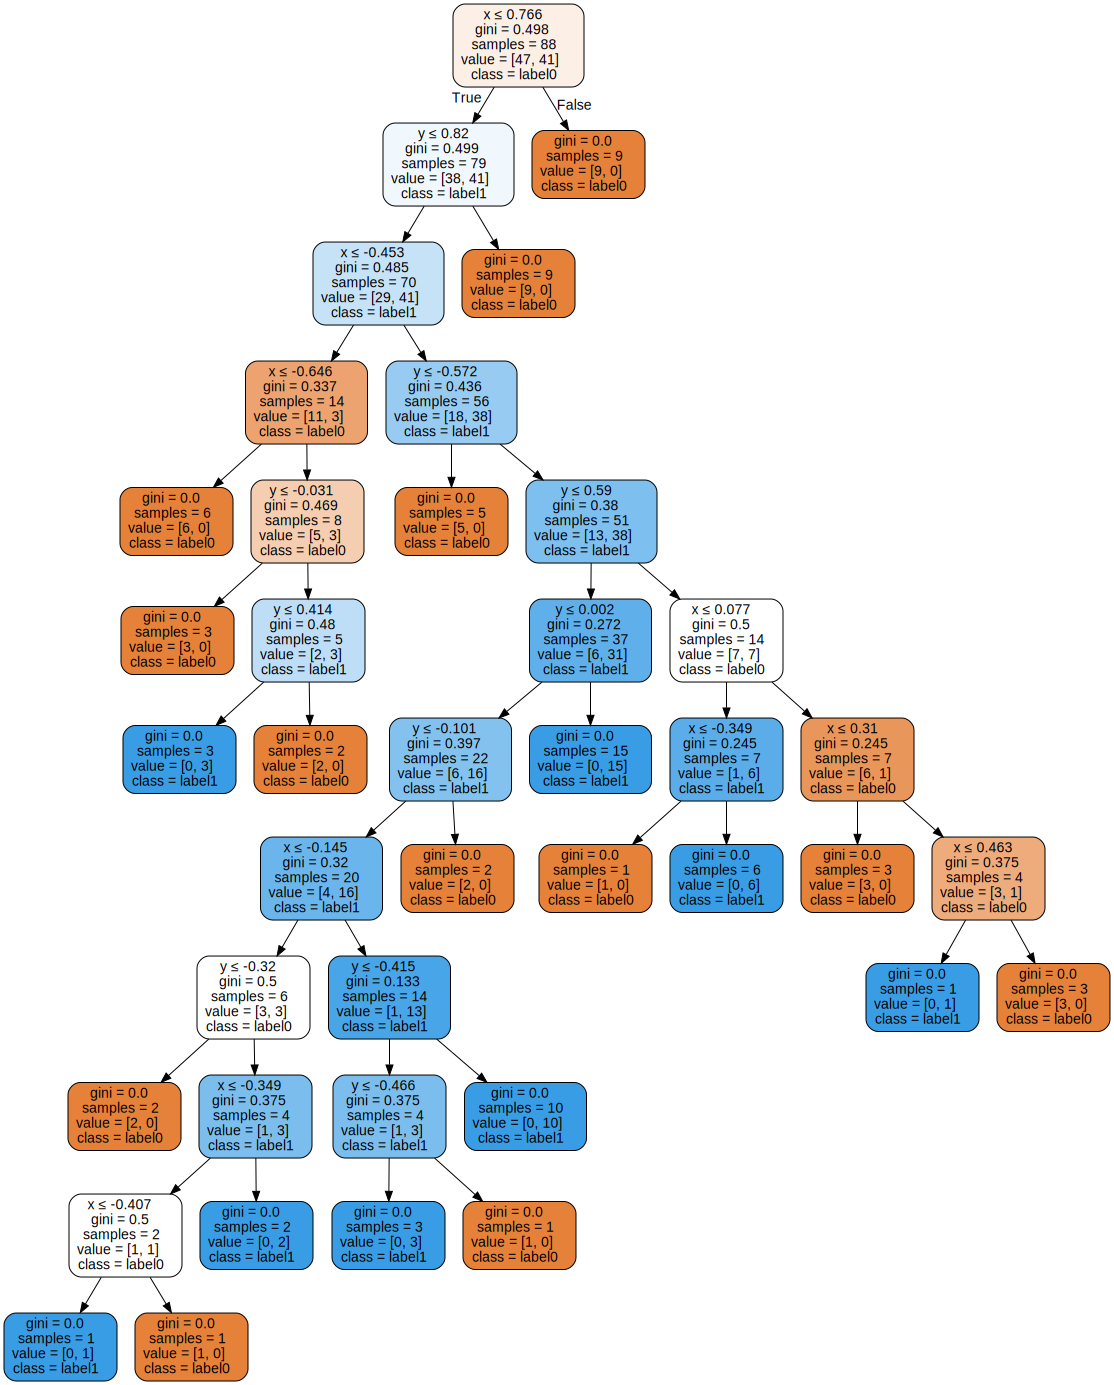

In [4]:
#导出决策树


dot_data = tree.export_graphviz(model,
                                out_file=None,
                                #特征的名字，要设置
                                feature_names = ['x','y'],
                                class_names=['label0','label1'],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('cart_1')
graph


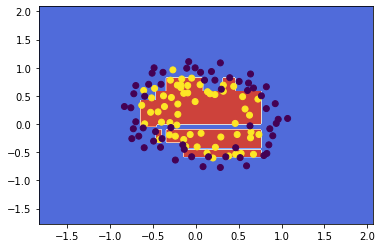


训练集：
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47
         1.0       1.00      1.00      1.00        41

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88


测试集：
               precision    recall  f1-score   support

         0.0       0.92      0.67      0.77        18
         1.0       0.65      0.92      0.76        12

    accuracy                           0.77        30
   macro avg       0.79      0.79      0.77        30
weighted avg       0.81      0.77      0.77        30



In [14]:
#获取数据值所在范围
x_min,x_max = x_data[:,0].min() - 1,x_data[:,0].max() + 1
y_min,y_max = x_data[:,1].min() - 1,x_data[:,1].max() + 1

#生成网格矩阵
xx,yy = np.meshgrid(
                                          np.arange(x_min,x_max,0.02),
                                          np.arange(y_min,y_max,0.02)
                                      )
z = model.predict(np.c_[xx.ravel(),yy.ravel()])
#扁平化，得到一个一个的点
#ravel和flatten类似，多维数据转一维，flatten不会改变原始数据，而ravel会

z = z.reshape(xx.shape)
#等高线图
#在这里，只有两个高度，0和1
cs = plt.contourf(xx,yy,z,cmap=plt.cm.coolwarm)

#训练样本散点图
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
# plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

predictions = model.predict(x_train)
#查看分类的结果和正确率等等。
print('\n训练集：\n',classification_report(predictions,y_train))

predictions = model.predict(x_test)
print('\n测试集：\n',classification_report(predictions,y_test))
